![agents](images/header.jpg)
# Limpieza y tokenización
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/nlp/blob/master/Introducción.ipynb)

## Tokenización

El primer paso para analizar el mensaje contenido en un documento de texto es la **tokenización**, es decir, la segmentación del texto original (en bruto) para obtener un conjunto de palabras y símbolos que puedan ser analizados como entidades con significado. 

La definción de *token*, particularmente en su uso en informática, no es muy preciso. Sin embargo, hay un concenso establecido en entender un *token* como la ocurrencia individual de una unidad mínima de lenguaje. Esta unidad puede pertenecer a una diversidad de *tipos* de elementos gramaticales y su única restricción es que sea un bloque de texto útil para transmitir un mensaje. En muchos casos, la tokenización se realiza como parte del análisis léxico, de tal manera que conforme se van obteniendo los tokens se les va asignando una categoría.En este curso y por razones prácticas, limitaremos la tokenización a la segmentación del texto en unidades sin categorizar, dejando ésta tarea adicional para la fase de análisis léxico.

![](images/nlp02b.png)

La pertinencia de esta división depende mucho del lenguaje y del contexto del mensaje que se está analizando.

![](images/ideo_tok.png)

En el caso de languajes como el español y el inglés, la estructura del lenguaje escrito es predominantemente alfabética con el uso de logogramas para representación alternativa/compacta de números y para símbolos ([sistemas de escritura](https://en.wikipedia.org/wiki/Writing_system)). En este caso, la segmentación de un texto en *tokens* es relativamente simple, utilizando caracteres de demarcación como pueden ser los espacios en blanco y los signos de puntuación.

Utilizando la bibliotec [nltk (*Natural language toolkit*)](http://www.nltk.org) de python, por ejemplo, podemos descomponer el siguiente [texto](https://www.youtube.com/watch?v=CJkBsVGRNF0):

> Grave desencanto te ha dado, a resultas, uh, uh, <br>
del cual te dedicas ahora a las ciencias ocultas.  <br>
Tú que ya eras torpe de racionalista,  <br>
no lo tienes fácil, Satanás te asista.  <br>
Siendo sólo fea, siendo sólo arpía,  <br>
nunca serás bruja de categoría.  <br>

en frases...

In [1]:
from IPython.display import display
import pandas as pd
pd.options.display.max_colwidth = 150 # Modificar la longitud de caracteres en una celda que se imprimirán 
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import string

In [2]:
raw_text = [r"""Grave desencanto te ha dado, a resultas, uh, uh, 
del cual te dedicas ahora a las ciencias ocultas. 
Tú que ya eras torpe de racionalista, 
no lo tienes fácil, Satanás te asista. 
Siendo sólo fea, siendo sólo arpía, 
nunca serás bruja de categoría."""]
print(raw_text[0], "\n")

frases = sent_tokenize(raw_text[0])
print(frases, "\n")

#Convertir a Dataframe, para manipular más adecuadamente
df_frases = pd.DataFrame(frases)
df_frases.columns = ["Frase"]
display(df_frases)

Grave desencanto te ha dado, a resultas, uh, uh, 
del cual te dedicas ahora a las ciencias ocultas. 
Tú que ya eras torpe de racionalista, 
no lo tienes fácil, Satanás te asista. 
Siendo sólo fea, siendo sólo arpía, 
nunca serás bruja de categoría. 

['Grave desencanto te ha dado, a resultas, uh, uh, \ndel cual te dedicas ahora a las ciencias ocultas.', 'Tú que ya eras torpe de racionalista, \nno lo tienes fácil, Satanás te asista.', 'Siendo sólo fea, siendo sólo arpía, \nnunca serás bruja de categoría.'] 



,Frase
0,"Grave desencanto te ha dado, a resultas, uh, uh, \ndel cual te dedicas ahora a las ciencias ocultas."
1,"Tú que ya eras torpe de racionalista, \nno lo tienes fácil, Satanás te asista."
2,"Siendo sólo fea, siendo sólo arpía, \nnunca serás bruja de categoría."


... o en palabras+símbolos

In [3]:
palabras = word_tokenize(df_frases.iloc[0,0]) # Pasar el valor en la primera celda del dataframe al tokenizador
df_palabras = pd.DataFrame(palabras)
df_palabras.columns = ["Palabra"]
display(df_palabras)

,Palabra
0,Grave
1,desencanto
2,te
3,ha
4,dado
5,","
6,a
7,resultas
8,","
9,uh


![ ](images/blank.png)
## Limpieza del texto en bruto

Un problema que enfrentamos usualmente en el reconocimiento de patrones es que los datos suelen venir "sucios", es decir, pueden incluir valores falsos o inusuales que afectan la eficacia de los métodos. Este problema es particularmente importante en el caso del análisis automático de textos. La razón de ello es que, en una gran mayoría de los casos, los documentos de texto disponibles se escriben escritos de manera "*libre*", sin sujetarse a estructuras formales.

[![](images/nlp03.png)](https://squirro.com/2017/02/16/unstructured-data-waking-giant/)

Estos textos suelen contener errores de escritura (*typos*) y de gramática, palabras de algún argot, contenido no deseado como URLs o etiquetas de marcaje. Considérese, por ejemplo, la siguiente revisión (alterada -\_-) de una película:

> I thought that Ice Age was an excellent movie! As a woman of 30, with no children, I really &amp;lt;3 these animated movies. They're fantastic! &lt;br />&lt;br />&lt;b>Sid&lt;/b> is the best character I have seen in some time, better than &lt;i>Bartok&lt;/i> in Anastasia &amp;amp; even more humorous than &lt;i>Melman&lt;/i> in Madagascar. &lt;br />&lt;br />My favourite scene is the part where Sid says \Oh, oh, oh, I love this game!\" and Sid and Manny continue to figure out what the squirrel is trying to tell them about the \"tigers\"...\"Pack of wolves, pack of bears, pack of fleas, pack of whiskers, pack of noses, pack a derm?, pack of lies, pack of troubles, pack a wallop, pack of birds, pack of flying fish...\" or however that part goes! ROFL, that's so funny LMAO! &lt;br />&lt;br />If anyone has any tips on where to buy the director's cut version, please email me at darkmaster666@yahoo.com.

Al repetir los ejercicios de tokenización obtenemos:

In [4]:
raw_text2 = [r"""I thought that Ice Age was an excellent movie! As a woman of 30, with no children, I really
            &lt;3 these animated movies. They're fantastic! <br /><br /><b>Sid</b> is the best character I have 
            seen in some time, better than <i>Bartok</i> in Anastasia &amp; even more humorous than <i>Melman</i> 
            in Madagascar. <br /><br />My favourite scene is the part where Sid says \Oh, oh, oh, I love this 
            game!\" and Sid "\ and Manny continue to figure out what the squirrel is trying to tell them about 
            the \"tigers\"... \"Pack of wolves, pack of bears, pack of fleas, pack of whiskers, pack of noses, 
            pack a derm?, pack of lies, pack of troubles, pack a wallop, pack of birds, pack of flying fish...\" 
            or however that part goes! ROFL, that's so funny LMAO! <br /><br />If anyone has any tips on where to 
            buy the director's cut version, please email me at darkmaster666@yahoo.com.""".replace('\n',' ')]

raw_text2[0] = ' '.join(raw_text2[0].split())
print(raw_text2[0], "\n")

frases2 = sent_tokenize(raw_text2[0])
df_frases2 = pd.DataFrame(frases2)
df_frases2.columns = ["Frase"]
display(df_frases2)

palabras2 = word_tokenize(raw_text2[0][83:150]) # Pasar un segmento de la cadena al tokenizador
df_palabras2 = pd.DataFrame(palabras2)
df_palabras2.columns = ["Palabra"]
display(df_palabras2)

I thought that Ice Age was an excellent movie! As a woman of 30, with no children, I really &lt;3 these animated movies. They're fantastic! <br /><br /><b>Sid</b> is the best character I have seen in some time, better than <i>Bartok</i> in Anastasia &amp; even more humorous than <i>Melman</i> in Madagascar. <br /><br />My favourite scene is the part where Sid says \Oh, oh, oh, I love this game!\" and Sid "\ and Manny continue to figure out what the squirrel is trying to tell them about the \"tigers\"... \"Pack of wolves, pack of bears, pack of fleas, pack of whiskers, pack of noses, pack a derm?, pack of lies, pack of troubles, pack a wallop, pack of birds, pack of flying fish...\" or however that part goes! ROFL, that's so funny LMAO! <br /><br />If anyone has any tips on where to buy the director's cut version, please email me at darkmaster666@yahoo.com. 



,Frase
0,I thought that Ice Age was an excellent movie!
1,"As a woman of 30, with no children, I really &lt;3 these animated movies."
2,They're fantastic!
3,"<br /><br /><b>Sid</b> is the best character I have seen in some time, better than <i>Bartok</i> in Anastasia &amp; even more humorous than <i>Mel..."
4,"<br /><br />My favourite scene is the part where Sid says \Oh, oh, oh, I love this game!\"" and Sid ""\ and Manny continue to figure out what the sq..."
5,"ROFL, that's so funny LMAO!"
6,"<br /><br />If anyone has any tips on where to buy the director's cut version, please email me at darkmaster666@yahoo.com."


,Palabra
0,I
1,really
2,&
3,lt
4,;
5,3
6,these
7,animated
8,movies
9,.


En esta segmentación podemos observar la presencia de *tokens* que son de poca utilidad para analizar el mensaje o que incluso son el resutado de una "mala" segmentación. Destaca el conjunto de tokens 2 al 5 en este dataframe (&amp;, lt, ;, 3) que debieran visualizarse como <3 e interpretarse como "love". También preocupa el token "'re" o los símbolos obtenidos de las etiquetas de marcaje.

De esta manera, antesa de proceder a tokenizar el texto conviene realizar algunas tareas de limpieza. 

#### 1. Texto en minúsculas
La primera de ellas, que en una aproximación estándar no afecta la interpretación del texto y facilita, por otra parte, la comparación de tokens, consisten en transformar el texto a minúsculas:

In [5]:
texto1 = raw_text2[0].lower()
print(texto1)

i thought that ice age was an excellent movie! as a woman of 30, with no children, i really &lt;3 these animated movies. they're fantastic! <br /><br /><b>sid</b> is the best character i have seen in some time, better than <i>bartok</i> in anastasia &amp; even more humorous than <i>melman</i> in madagascar. <br /><br />my favourite scene is the part where sid says \oh, oh, oh, i love this game!\" and sid "\ and manny continue to figure out what the squirrel is trying to tell them about the \"tigers\"... \"pack of wolves, pack of bears, pack of fleas, pack of whiskers, pack of noses, pack a derm?, pack of lies, pack of troubles, pack a wallop, pack of birds, pack of flying fish...\" or however that part goes! rofl, that's so funny lmao! <br /><br />if anyone has any tips on where to buy the director's cut version, please email me at darkmaster666@yahoo.com.


#### 2. Eliminación de URLs

Si nos fijamos en la segmentación de las últimas palabras en este texto, observamos lo siguiente:

In [6]:
display(raw_text2[0][825:])

palabras3 = word_tokenize(raw_text2[0][824:])
df_palabras3 = pd.DataFrame(palabras3)
df_palabras3.columns = ["Palabra"]
display(df_palabras3)

'please email me at darkmaster666@yahoo.com.'

,Palabra
0,please
1,email
2,me
3,at
4,darkmaster666
5,@
6,yahoo.com
7,.


Por una parte, la dirección de correo electrónico aporta muy poco a la interpretación del mensaje (basta saber que la autora desea que se el envíe información) y por otra parte, la dirección (un solo objeto) fue descompuesto en 3 tokens. Usualmente esta es otra tarea de limpieza del texto: eliminar las URLs. Para ello, lo más simple es emplear expresiones regulares que reconocan estas palabras y las eliminen.

In [7]:
import re

texto2 = re.sub(r'[\w\.-]+@[\w\.-]+', " ", texto1)
texto2 = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '',  texto2)
print(texto2)

i thought that ice age was an excellent movie! as a woman of 30, with no children, i really &lt;3 these animated movies. they're fantastic! <br /><br /><b>sid</b> is the best character i have seen in some time, better than <i>bartok</i> in anastasia &amp; even more humorous than <i>melman</i> in madagascar. <br /><br />my favourite scene is the part where sid says \oh, oh, oh, i love this game!\" and sid "\ and manny continue to figure out what the squirrel is trying to tell them about the \"tigers\"... \"pack of wolves, pack of bears, pack of fleas, pack of whiskers, pack of noses, pack a derm?, pack of lies, pack of troubles, pack a wallop, pack of birds, pack of flying fish...\" or however that part goes! rofl, that's so funny lmao! <br /><br />if anyone has any tips on where to buy the director's cut version, please email me at  


#### 3. Eliminación de etiquetas de marcaje

A continuación, eliminamos las etiquetas de marcaje cuya función principal es agregar "emotividad" al mensaje. Esta actividad también puede realizarse mediante el uso de expresiones regulares, sin embargo, la biblioteca **BeautifulSoup** arroja muy buenos resultados y es de fácil uso:

In [8]:
from bs4 import BeautifulSoup

texto3 = BeautifulSoup(texto2, "lxml").get_text() 
print(texto3)

i thought that ice age was an excellent movie! as a woman of 30, with no children, i really <3 these animated movies. they're fantastic! sid is the best character i have seen in some time, better than bartok in anastasia & even more humorous than melman in madagascar. my favourite scene is the part where sid says \oh, oh, oh, i love this game!\" and sid "\ and manny continue to figure out what the squirrel is trying to tell them about the \"tigers\"... \"pack of wolves, pack of bears, pack of fleas, pack of whiskers, pack of noses, pack a derm?, pack of lies, pack of troubles, pack a wallop, pack of birds, pack of flying fish...\" or however that part goes! rofl, that's so funny lmao! if anyone has any tips on where to buy the director's cut version, please email me at  


#### 4. Eliminar signos de puntuación

Los signos de puntuación tienen dos efectos negativos: 1) Se identifican como tokens independientes, haciendo más complejo el espacio de características, y 2) Dificulta segmentar una cadena (cuando no se utiliza una biblioteca especializada como *nltk.tokenize*).

In [9]:
palabras3 = word_tokenize(raw_text2[0])
print("Tokens diferentes en el texto completo (usando nltk.tokenize): ", 
      len( set(palabras3)), "\n")

puncList = [".", ";", ":", "!", "?", "/", "\\", ",", ")", "(", "\""]
for punc in puncList:
    palabras3 = [word.replace(punc,'') for word in palabras3]
print("Tokens diferentes en el texto sin signos de puntuación (usando nltk.tokenize): ", 
      len( set(palabras3)), "\n")

print("Tokens en el texto completo utilizando string.split, delimitando con espacios:\n",
     texto3.split())

Tokens diferentes en el texto completo (usando nltk.tokenize):  127 

Tokens diferentes en el texto sin signos de puntuación (usando nltk.tokenize):  118 

Tokens en el texto completo utilizando string.split, delimitando con espacios:
 ['i', 'thought', 'that', 'ice', 'age', 'was', 'an', 'excellent', 'movie!', 'as', 'a', 'woman', 'of', '30,', 'with', 'no', 'children,', 'i', 'really', '<3', 'these', 'animated', 'movies.', "they're", 'fantastic!', 'sid', 'is', 'the', 'best', 'character', 'i', 'have', 'seen', 'in', 'some', 'time,', 'better', 'than', 'bartok', 'in', 'anastasia', '&', 'even', 'more', 'humorous', 'than', 'melman', 'in', 'madagascar.', 'my', 'favourite', 'scene', 'is', 'the', 'part', 'where', 'sid', 'says', '\\oh,', 'oh,', 'oh,', 'i', 'love', 'this', 'game!\\"', 'and', 'sid', '"\\', 'and', 'manny', 'continue', 'to', 'figure', 'out', 'what', 'the', 'squirrel', 'is', 'trying', 'to', 'tell', 'them', 'about', 'the', '\\"tigers\\"...', '\\"pack', 'of', 'wolves,', 'pack', 'of', 'bea

Una elección común es eliminar los signos de puntuación:

In [10]:
words = texto3.split()
for punc in puncList:
    words = [word.replace(punc,'') for word in words]

texto4 = " ".join(words)
print(texto4)

i thought that ice age was an excellent movie as a woman of 30 with no children i really <3 these animated movies they're fantastic sid is the best character i have seen in some time better than bartok in anastasia & even more humorous than melman in madagascar my favourite scene is the part where sid says oh oh oh i love this game and sid  and manny continue to figure out what the squirrel is trying to tell them about the tigers pack of wolves pack of bears pack of fleas pack of whiskers pack of noses pack a derm pack of lies pack of troubles pack a wallop pack of birds pack of flying fish or however that part goes rofl that's so funny lmao if anyone has any tips on where to buy the director's cut version please email me at


Una alternativa que rescata la estructura marcada por el punto, que delimita las oraciones en un texto, consiste en procesar por frases:

In [11]:
frases3 = sent_tokenize(texto3)
df_frases3 = pd.DataFrame(frases3)
df_frases3.columns = ["Frase"]

for punc in puncList:
    df_frases3["Frase"] = [word.replace(punc,'') for word in df_frases3["Frase"]]

display(df_frases3)

,Frase
0,i thought that ice age was an excellent movie
1,as a woman of 30 with no children i really <3 these animated movies
2,they're fantastic
3,sid is the best character i have seen in some time better than bartok in anastasia & even more humorous than melman in madagascar
4,my favourite scene is the part where sid says oh oh oh i love this game and sid and manny continue to figure out what the squirrel is trying to t...
5,rofl that's so funny lmao
6,if anyone has any tips on where to buy the director's cut version please email me at


#### 5. Eliminación de apostrofos

El uso de apóstrofos es poco común en español; según la [Wikipedia](https://es.wikipedia.org/wiki/Apóstrofo):

>En las lenguas que utilizan el alfabeto latino, el apóstrofo indica por lo general la elisión de una letra. También se utiliza para indicar uno o más fonemas suprimidos por razones métricas (en poesía, especialmente) o simulando una pronunciación dialectal: <br><br>
Ya ciego con la vista’e la prenda, siguió nuestro hombre pa’l río y en llegando la vido que nadaba cerquita’e la orilla <br>(Güiraldes, Ricardo. Don Segundo Sombra, 1926)<br><br>
Tales empleos son siempre arcaicos, pseudofonéticos o especializados, y el signo es raro en la escritura formal de uso corriente.

Sin embargo, en otros [idiomas](https://en.wikipedia.org/wiki/Apostrophe), el apostrofo puede ser de uso común. En el caso del inglés su uso suele ser criticado y visto como poco formal, sin embargo, es un elemento muy común en el contexto no formal, como el provisto por las redes sociales.

Lo mismo en inglés que en español, el apostrofo suele representar una redundancia en el idioma. El token "*pa'l*" ofrece la misma información que el par de tokens ("para", "el"). Lo mismo que en inglés, "they're" duplica la información ofrecida por ("they", "are"). De manera que es una buena práctica eliminar los términos con apostrofos, reemplazándolos por su equivalente extendido:

In [12]:
APOSTROFOS = {"that's" : "that is", "they're" : "they are"} # Se requiere construir un diccionario extenso 
words = texto4.split()
texto5 = [APOSTROFOS[word] if word in APOSTROFOS else word for word in words]
texto5 = " ".join(texto5)
print(texto5)

df_frases4 = df_frases3.copy()   
for i in range(len(df_frases4.index)):
    words_row = [APOSTROFOS[word] if word in APOSTROFOS else word for word in df_frases4["Frase"].iloc[i].split()]
    df_frases4['Frase'].iloc[i] = " ".join(words_row)

display(df_frases4)

i thought that ice age was an excellent movie as a woman of 30 with no children i really <3 these animated movies they are fantastic sid is the best character i have seen in some time better than bartok in anastasia & even more humorous than melman in madagascar my favourite scene is the part where sid says oh oh oh i love this game and sid and manny continue to figure out what the squirrel is trying to tell them about the tigers pack of wolves pack of bears pack of fleas pack of whiskers pack of noses pack a derm pack of lies pack of troubles pack a wallop pack of birds pack of flying fish or however that part goes rofl that is so funny lmao if anyone has any tips on where to buy the director's cut version please email me at


,Frase
0,i thought that ice age was an excellent movie
1,as a woman of 30 with no children i really <3 these animated movies
2,they are fantastic
3,sid is the best character i have seen in some time better than bartok in anastasia & even more humorous than melman in madagascar
4,my favourite scene is the part where sid says oh oh oh i love this game and sid and manny continue to figure out what the squirrel is trying to te...
5,rofl that is so funny lmao
6,if anyone has any tips on where to buy the director's cut version please email me at


#### 6. Eliminar argot

El argot es un lenguaje especializado utilizado para ocultar información ("echarse un perico" -¡no lo hagan!-), para definir identidad ("¡ah'ñil!" -> "Por supuesto"), para simplificar o abreviar una conversación ("¡fierro!" -> "¡hagámoslo de inmediato!"), como adopción de un término extranjero sin traducción natural ("tokenizar"), como aceptación de un término incorrecto ("vocho"), etc. 

Actualmente, con la proliferación de las redes sociales, con la posibilidad de publicar sin ninguna restricción, sin requisitos de respetar reglas ortográficas, sin correctores y con la prisa de contestar mensajes con la mayor simplicidad posible, el lenguaje escrito y disponible en la Web se ha plagado de términos que, no siendo correctos, podemos englobar dentro del rubro de lenguaje argot. Para simplificar el análisis del texto, eliminamos también éstos términos:

In [13]:
SLANG = {"<3" : "love", "rofl" : "i laugh hysterically", "lmao" : "I get really happy", "&" : "and"}
words = texto5.split()
texto6 = [SLANG[word] if word in SLANG else word for word in words]
texto6 = " ".join(texto6)
print(texto6)

df_frases5 = df_frases4.copy()   
for i in range(len(df_frases5.index)):
    words_row = [SLANG[word] if word in SLANG else word for word in df_frases5["Frase"].iloc[i].split()]
    df_frases5['Frase'].iloc[i] = " ".join(words_row)
display(df_frases5)

i thought that ice age was an excellent movie as a woman of 30 with no children i really love these animated movies they are fantastic sid is the best character i have seen in some time better than bartok in anastasia and even more humorous than melman in madagascar my favourite scene is the part where sid says oh oh oh i love this game and sid and manny continue to figure out what the squirrel is trying to tell them about the tigers pack of wolves pack of bears pack of fleas pack of whiskers pack of noses pack a derm pack of lies pack of troubles pack a wallop pack of birds pack of flying fish or however that part goes i laugh hysterically that is so funny I get really happy if anyone has any tips on where to buy the director's cut version please email me at


,Frase
0,i thought that ice age was an excellent movie
1,as a woman of 30 with no children i really love these animated movies
2,they are fantastic
3,sid is the best character i have seen in some time better than bartok in anastasia and even more humorous than melman in madagascar
4,my favourite scene is the part where sid says oh oh oh i love this game and sid and manny continue to figure out what the squirrel is trying to te...
5,i laugh hysterically that is so funny I get really happy
6,if anyone has any tips on where to buy the director's cut version please email me at


#### 7. Eliminar otros caracteres no alfabéticos

Una vez que se han recuperado todas las palabras "codificadas" (como <3, por ejemplo), se eliminan los caracteres no alfabéticos restantes. Esto es simple con una expresión regular:

In [14]:
texto7 = re.sub("[^a-zA-Z]", " ", texto6).split()
texto7 = " ".join(texto7)
print(texto7)

df_frases6 = df_frases5.copy()   
df_frases6['Frase'] = [re.sub("[^a-zA-Z]", " ", word) for word in df_frases6["Frase"]]
display(df_frases6)

i thought that ice age was an excellent movie as a woman of with no children i really love these animated movies they are fantastic sid is the best character i have seen in some time better than bartok in anastasia and even more humorous than melman in madagascar my favourite scene is the part where sid says oh oh oh i love this game and sid and manny continue to figure out what the squirrel is trying to tell them about the tigers pack of wolves pack of bears pack of fleas pack of whiskers pack of noses pack a derm pack of lies pack of troubles pack a wallop pack of birds pack of flying fish or however that part goes i laugh hysterically that is so funny I get really happy if anyone has any tips on where to buy the director s cut version please email me at


,Frase
0,i thought that ice age was an excellent movie
1,as a woman of with no children i really love these animated movies
2,they are fantastic
3,sid is the best character i have seen in some time better than bartok in anastasia and even more humorous than melman in madagascar
4,my favourite scene is the part where sid says oh oh oh i love this game and sid and manny continue to figure out what the squirrel is trying to te...
5,i laugh hysterically that is so funny I get really happy
6,if anyone has any tips on where to buy the director s cut version please email me at


#### 8. Eliminación de palabras vacías

Las palabras vacías ("*[stop words](http://onlinelibrary.wiley.com/doi/10.1002/asi.5090110403/abstract;jsessionid=42107B5630F9A4EFA66CE2C72AB40934.f04t01)*") son palabras que, debido a que tienen una alta frecuencia, distorsionan el análisis de un texto. 

Considérese, por ejemplo, el texto del cuento [Anaconda](http://www.cuentosinfin.com/anaconda/) de Horacio Quiroga. Las frecuencias de las palabras utilizadas en este texto son:

Cantidad de palabras en el texto:  10067

Palabras más populares:
 [('de', 507), ('la', 456), ('y', 265), ('a', 264), ('el', 261), ('que', 246), ('en', 212), ('se', 156), ('un', 134), ('las', 126), ('no', 113), ('con', 105), ('una', 96), ('por', 95), ('los', 95), ('su', 86), ('del', 73), ('pero', 69), ('es', 67), ('al', 60), ('para', 60), ('lo', 58), ('ñacaniná', 57), ('cruzada', 55), ('más', 50), ('víboras', 42), ('sus', 35), ('perro', 35), ('como', 33), ('qué', 33), ('anaconda', 32), ('hombre', 32), ('ya', 32), ('sobre', 31), ('había', 31), ('cabeza', 30), ('dos', 28), ('congreso', 28), ('todas', 28), ('cobra', 28), ('sí', 27), ('dijo', 27), ('si', 27), ('yarará', 26), ('hombres', 26), ('me', 25), ('lanceolada', 24), ('bien', 23), ('esta', 23), ('vez', 22)]


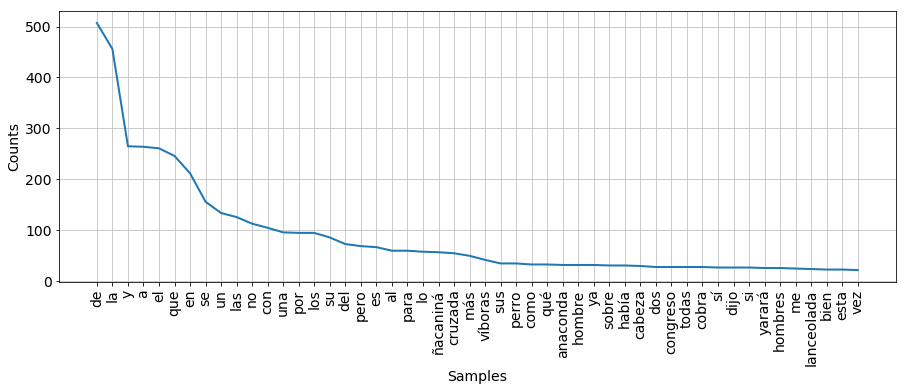

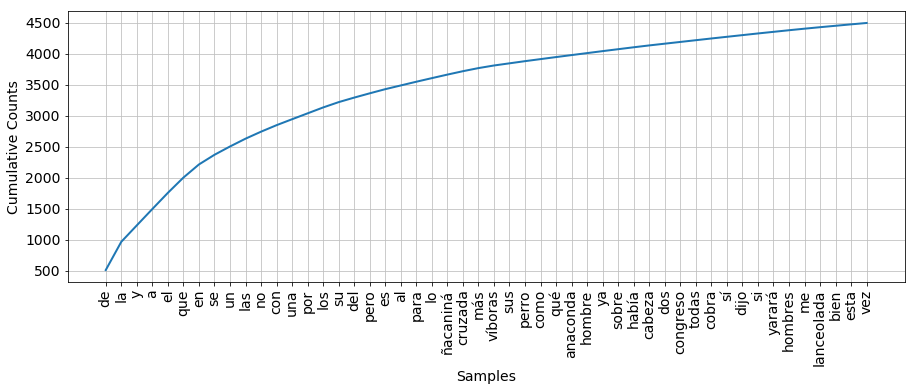

In [15]:
puncSpList = [".", ";", ":", "!", "¡", "¿", "?", "/", "-", "\\", ",", ")", "(", "\""]
file = open("public literature/Anaconda.txt", encoding='utf-8')
anaconda = file.read()
file.close()

anaconda = anaconda.lower().split()
for punc in puncSpList:
    anaconda = [word.replace(punc,'') for word in anaconda]
most_common_words = nltk.FreqDist(anaconda)

print("Cantidad de palabras en el texto: ", most_common_words.N())
print("\nPalabras más populares:\n", most_common_words.most_common(50))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15, 5))
most_common_words.plot(50, cumulative=False)
plt.figure(figsize=(15, 5))
most_common_words.plot(50, cumulative=True)

Puede observarse que las palabras con mayor frecuencia son palabras que no describen el tema del texto ("de", "la", "a"...). La primera palabra "importante" es "*ñacaniná*" (una serpiente) y tiene apena una frecuencia de 57 (comparada con 507 apariciones de la palabra "de". Las palabras previas acumulan más de 3700 palabras (de un total de 10067).

Si ahora eliminamos las *palabras vacías*, obtenemos lo siguiente:

Cantidad de palabras en el texto:  5328

Palabras más populares:
 [('ñacaniná', 57), ('cruzada', 55), ('víboras', 42), ('perro', 35), ('anaconda', 32), ('hombre', 32), ('cabeza', 30), ('dos', 28), ('congreso', 28), ('todas', 28), ('cobra', 28), ('dijo', 27), ('si', 27), ('yarará', 26), ('hombres', 26), ('lanceolada', 24), ('bien', 23), ('vez', 22), ('real', 22), ('terrífica', 22), ('veneno', 21), ('hamadrías', 20), ('víbora', 19), ('murmuró', 18), ('gran', 17), ('ojos', 17), ('aquí', 17), ('repuso', 17), ('nuevo', 17), ('cuerpo', 17), ('tiempo', 16), ('aún', 16), ('mientras', 16), ('menos', 15), ('culebra', 15), ('caballos', 15), ('casa', 14), ('vida', 14), ('hacer', 14), ('muerte', 14), ('ver', 14), ('puede', 13), ('así', 13), ('instituto', 13), ('instante', 13), ('caverna', 12), ('punto', 12), ('cuello', 12), ('momento', 11), ('día', 11)]


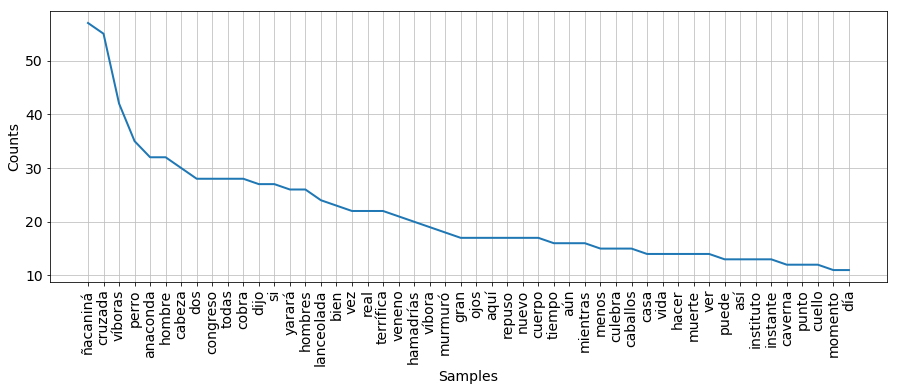

In [16]:
from nltk.corpus import stopwords # Importar la lista de palabras vacías
sw = set(stopwords.words("spanish"))

anaconda = [w for w in anaconda if not w in sw]

most_common_words = nltk.FreqDist(anaconda)

print("Cantidad de palabras en el texto: ", most_common_words.N())
print("\nPalabras más populares:\n", most_common_words.most_common(50))

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15, 5))
most_common_words.plot(50, cumulative=False)

Ahora, el conjunto de palabras sobresalientes es más descriptivo. 

A continuación se eliminan las palabras vacías del texto de opinión de películas.

In [17]:
stops = set(stopwords.words("english"))

words = texto7.split()
texto8 = [w for w in words if not w in stops]   
texto8 = " ".join(texto8)
print(texto8)

df_frases7 = df_frases6.copy()   
for i in range(len(df_frases7.index)):
    words_row = [word for word in df_frases7["Frase"].iloc[i].split() if not word in stops]
    df_frases7['Frase'].iloc[i] = " ".join(words_row)
display(df_frases7)

thought ice age excellent movie woman children really love animated movies fantastic sid best character seen time better bartok anastasia even humorous melman madagascar favourite scene part sid says oh oh oh love game sid manny continue figure squirrel trying tell tigers pack wolves pack bears pack fleas pack whiskers pack noses pack derm pack lies pack troubles pack wallop pack birds pack flying fish however part goes laugh hysterically funny I get really happy anyone tips buy director cut version please email


,Frase
0,thought ice age excellent movie
1,woman children really love animated movies
2,fantastic
3,sid best character seen time better bartok anastasia even humorous melman madagascar
4,favourite scene part sid says oh oh oh love game sid manny continue figure squirrel trying tell tigers pack wolves pack bears pack fleas pack whis...
5,laugh hysterically funny I get really happy
6,anyone tips buy director cut version please email


## Otra vez, tokenización

Con el texto limpio, volvemos a hacer la tokenización. Este es un conjunto de tokens adecuado para analizar.

In [18]:
print(texto8.split())

['thought', 'ice', 'age', 'excellent', 'movie', 'woman', 'children', 'really', 'love', 'animated', 'movies', 'fantastic', 'sid', 'best', 'character', 'seen', 'time', 'better', 'bartok', 'anastasia', 'even', 'humorous', 'melman', 'madagascar', 'favourite', 'scene', 'part', 'sid', 'says', 'oh', 'oh', 'oh', 'love', 'game', 'sid', 'manny', 'continue', 'figure', 'squirrel', 'trying', 'tell', 'tigers', 'pack', 'wolves', 'pack', 'bears', 'pack', 'fleas', 'pack', 'whiskers', 'pack', 'noses', 'pack', 'derm', 'pack', 'lies', 'pack', 'troubles', 'pack', 'wallop', 'pack', 'birds', 'pack', 'flying', 'fish', 'however', 'part', 'goes', 'laugh', 'hysterically', 'funny', 'I', 'get', 'really', 'happy', 'anyone', 'tips', 'buy', 'director', 'cut', 'version', 'please', 'email']


## Conclusiones

En esta lección se analizaron las acciones generales para preparar un texto para ser analizado, particularmente en lo que se refiere a la limpieza de los datos, sin embargo, el proceso de preparación de los datos, es una tarea que debe adecuarse a cada problema y al entorno general del mismo. 

<hr style="border-width: 3px;">

### Tarea 2

Seleccione un conjunto de textos para el problema de su elección y aplique los pasos de limpieza de texto y tokenización realizados en esta lección.

**Fecha de entrega**: Viernes 20 de enero.